# Makine Öğrenmesi - Polynomial Regression

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

Veriyi dataframe içerisine yüklüyorum. Download etmek için (http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

In [4]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Bu veri grubu içerisinden hangilerini seçeceğime karar vermek için corr metodunu kullanabilirim. Buradaki kolon sayısı çok fazla olmadığı için pek anlamlı olmaz. Aşağıda sonuçları görebilirsiniz.

In [16]:
df.corr()[["CO2EMISSIONS"]].dropna().abs().sort_values(by=["CO2EMISSIONS"], ascending=False)[1:]

,CO2EMISSIONS
FUELCONSUMPTION_COMB_MPG,0.906394
FUELCONSUMPTION_CITY,0.898039
FUELCONSUMPTION_COMB,0.892129
ENGINESIZE,0.874154
FUELCONSUMPTION_HWY,0.861748
CYLINDERS,0.849685


In [17]:
# Modeli eğitmek için sadece belirlediğim alanları içeren bir dataset yaratacağım
cdf=df[["FUELCONSUMPTION_COMB","ENGINESIZE","CYLINDERS","CO2EMISSIONS"]]
cdf.head()

,FUELCONSUMPTION_COMB,ENGINESIZE,CYLINDERS,CO2EMISSIONS
0,8.5,2.0,4,196
1,9.6,2.4,4,221
2,5.9,1.5,4,136
3,11.1,3.5,6,255
4,10.6,3.5,6,244


Motor hacmi ile CO2 Emisyonun ilişkisini gösteren bir grafik çizelim.

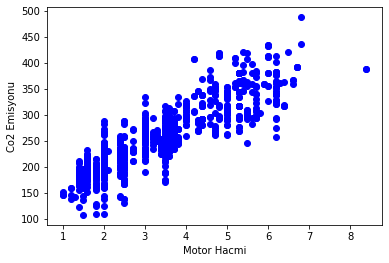

In [18]:
plt.scatter(cdf["ENGINESIZE"],cdf["CO2EMISSIONS"],color="blue")
plt.xlabel("Motor Hacmi")
plt.ylabel("Co2 Emisyonu")
plt.show()

***Train ve Test için elimizdeki verileri ikiye böleceğiz.***

In [20]:
msk=np.random.rand(len(df))<0.8 # %80 oranında rastgale True değer dönen bir dizi yarattıyoruz.
train=cdf[msk] # cdf dataframe içindeki verilerin %80 train olarak atanmış oldu.
test=cdf[~msk] # cdf dataframe içerisindeki verilerin %20'sini, train veri setine atananların dışındakileri test olarak ayırdık